In [2]:
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
# from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score, hinge_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC



In [4]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"
raw_data=pd.read_csv(url)

n_replicas = 10
df = pd.DataFrame(np.repeat(raw_data.values, n_replicas, axis=0), columns=raw_data.columns)

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


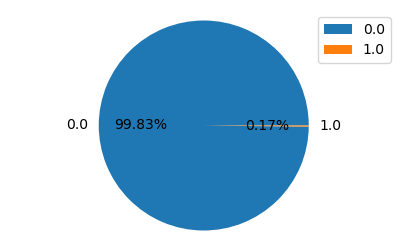

In [6]:
v_class = df["Class"].value_counts().values
plt.figure(figsize=(5,3))
plt.pie(v_class, labels = df["Class"].value_counts().index, autopct="%1.2f%%")
plt.axis("equal")
plt.legend()
plt.show()

<Axes: >

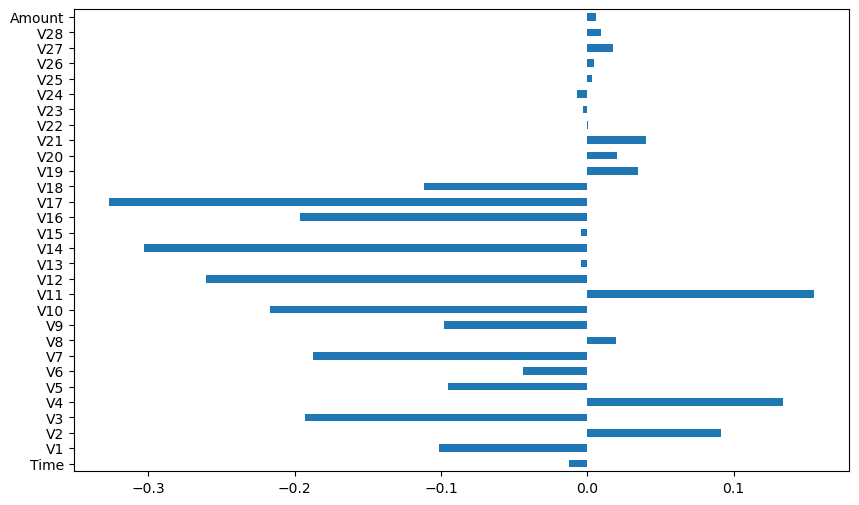

In [11]:
correlation_values = raw_data.corr()['Class'].drop('Class')
correlation_values.plot(kind='barh', figsize=(10, 6))

In [19]:
X = df.iloc[:, 1:30]
y = df.iloc[:, 30]

scale = StandardScaler()
X = scale.fit_transform(X)
X = normalize(X, norm="l1")

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) 

In [21]:
Dec_tree = DecisionTreeClassifier(max_depth=4, random_state=35, class_weight="balanced")

t0 = time.time()
Dec_tree.fit(X_train, y_train)
sklearn_time = time.time()-t0

In [25]:
print("[Scikit-Learn] Training time (s):", round(sklearn_time,2))

[Scikit-Learn] Training time (s): 46.66


In [18]:
yhat = Dec_tree.predict_proba(X_test)[:,1]
Dec_auc = roc_auc_score(y_test, yhat)
print(Dec_auc)

0.9662628370593128


In [29]:
svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False, dual="auto" , max_iter=10000)

t0 = time.time()
svm.fit(X_train, y_train)
sklearn_time = time.time() - t0
print(sklearn_time)

128.42853426933289


In [32]:
yhat1 = svm.decision_function(X_test)
yhat1[0:5]

array([-1.00220332, -0.56524741, -1.65579835, -0.61619769, -1.31017849])

In [34]:
acc_svm  = roc_auc_score(y_test, yhat1)
print(acc_svm)

0.9844956524851463


In [36]:
loss1 = hinge_loss(y_test, yhat1)
print(loss1)

0.23367672107487808


In [41]:
correlation_values = abs(df.corr()['Class']).drop('Class')
correlation_values = correlation_values.sort_values(ascending=False)[:6]
correlation_values

V17    0.326481
V14    0.302544
V12    0.260593
V10    0.216883
V16    0.196539
V3     0.192961
Name: Class, dtype: float64

In [43]:
X1 = df[['V17', 'V14', 'V12', 'V10', 'V16', 'V3']]
y = df.iloc[:, 30]

scale = StandardScaler()
X1 = scale.fit_transform(X1)
X1 = normalize(X1, norm="l1")
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42, stratify=y) 

In [45]:
Dec_tree = DecisionTreeClassifier(max_depth=4, random_state=35, class_weight="balanced")

t0 = time.time()
Dec_tree.fit(X1_train, y_train)
sklearn_time = time.time()-t0
print(sklearn_time)

yhat1 = Dec_tree.predict_proba(X1_test)[:,1]
Dec_auc = roc_auc_score(y_test, yhat1)
print(Dec_auc)

13.84548568725586
0.9599890152627734


In [52]:
svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False, dual="auto" , max_iter=100000)

t0 = time.time()
svm.fit(X1_train, y_train)
sklearn_time = time.time() - t0
print(sklearn_time)

yhat2 = svm.decision_function(X1_test)
auc_svm  = roc_auc_score(y_test, yhat2)
print(auc_svm)

76.2174506187439
0.9331020924299249
